In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords


In [2]:
df =pd.read_csv(r"C:\Users\anush\Downloads\archive\IMDB Dataset.csv")

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
import seaborn as sns

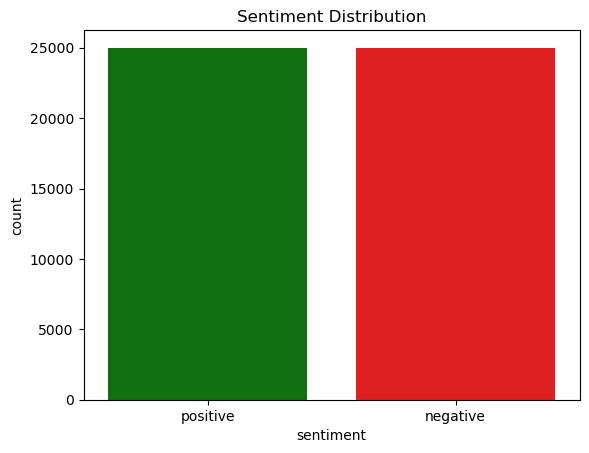

In [6]:
sns.countplot(x='sentiment', hue='sentiment', data=df, palette={"positive": "green", "negative": "red"}, legend=False)
plt.title("Sentiment Distribution")
plt.show()

In [7]:
df.dropna(inplace=True)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Text(0.5, 0.98, 'Number of words in reviews')

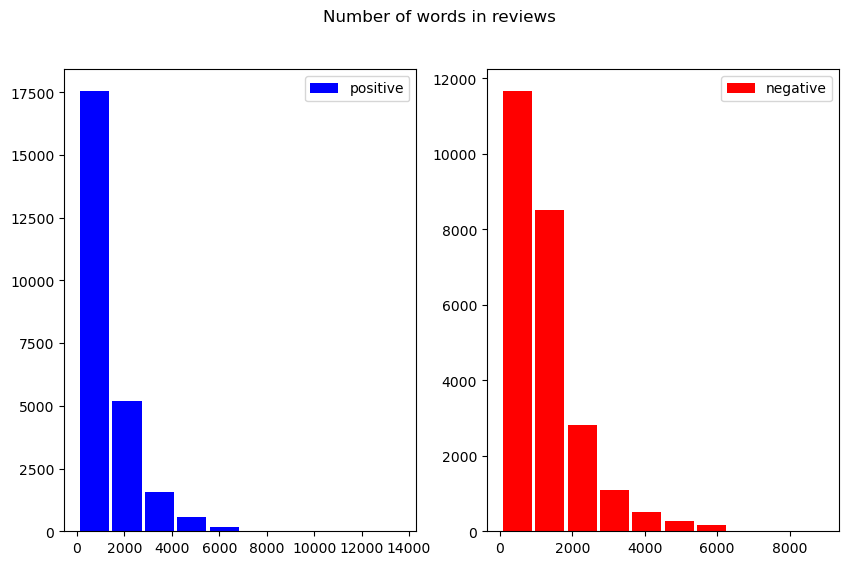

In [14]:
fig,ax =plt.subplots(1,2,figsize=(10,6))
ax[0].hist(df[df['sentiment']=='positive']['review'].str.len(),label='positive',color='blue',rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment']=='negative']['review'].str.len(),label='negative',color='red',rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in reviews")

In [12]:
# wordcloud
from wordcloud import WordCloud


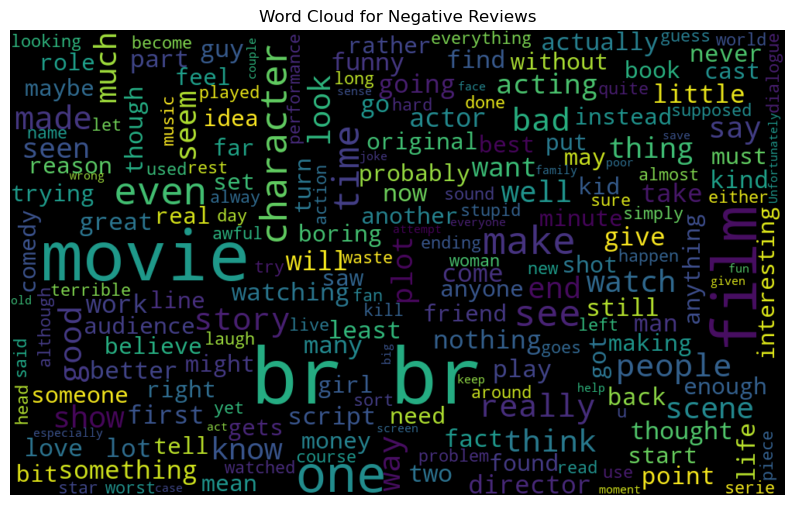

In [16]:
# draw wordcloud 
reviews=' '.join(word for word in df['review'][df['sentiment']=='negative'].astype(str))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()


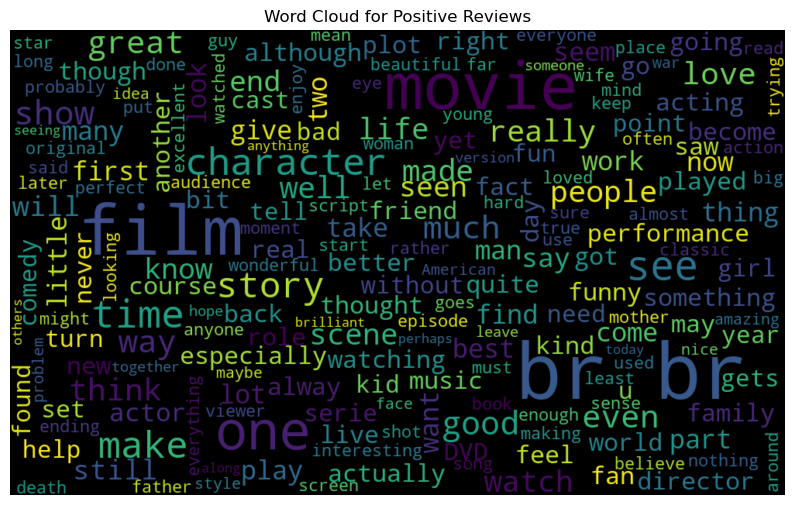

In [15]:
reviews=' '.join(word for word in df['review'][df['sentiment']=='positive'].astype(str))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)

In [ ]:
reviews=cv.fit_transform(df['review']).toarray()

In [20]:
df['sentiment']=df['sentiment'].replace(['positive','negative'],[1,0])
df['sentiment'].value_counts()

C:\Users\anush\AppData\Local\Temp\ipykernel_17584\3946330502.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment']=df['sentiment'].replace(['positive','negative'],[1,0])
C:\Users\anush\AppData\Local\Temp\ipykernel_17584\3946330502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment']=df['sentiment'].replace(['positive','negative'],[1,0])


sentiment
0    58
1    42
Name: count, dtype: int64

In [21]:
from sklearn.linear_model import LogisticRegression


In [22]:
model=LogisticRegression()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
reviews_train,reviews_test,sent_train,sent_test=train_test_split(reviews,df['sentiment'],test_size=0.2)

In [25]:
model.fit(reviews_train,sent_train)


LogisticRegression()

In [26]:
predict=model.predict(reviews_test)

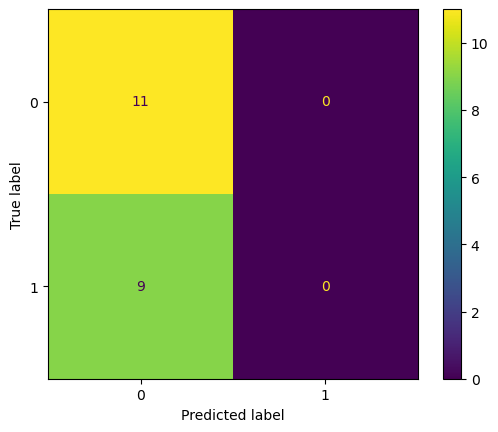

In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sent_test,predict,labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=model.classes_)
display.plot()
plt.show()


In [28]:
import pickle as pk

In [29]:
pk.dump(model,open('model.pkl','wb'))

In [ ]:
pk.dump(cv,open('scaler.pkl','wb'))